### Question 1 :
Given the input, apply blur, edge detection and other image processing approach to get the Expected output image

`Import the required libraries`

In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

`Function to display the images`

In [3]:
def display(img,name):
    plt.title(name)
    plt.imshow(img,cmap='gray') 
    plt.axis('off')

`Read the image`

In [42]:
input_img = cv2.imread('Images/input.jpeg')

output_img = cv2.imread('Images/expected-output.jpg')

(<Axes: title={'center': 'Expected Output'}>, None)

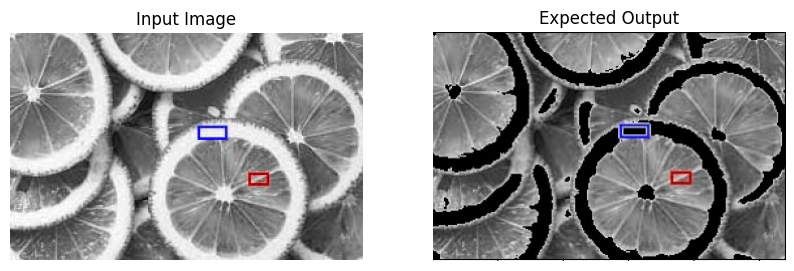

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(121), display(input_img,'Input Image')
plt.subplot(122), display(output_img,'Expected Output')

`HSV Image`

HSV stands for Hue, Saturation, and Value. It's a type of color space, similar to the RGB color space that's commonly used in digital images. The HSV color space represents colors in a way that's more intuitive for humans to understand and manipulate.\
Note : To convert an image into HSV, the image should be in RGB format(that's why I haven't converted the input_img to gray scale image).

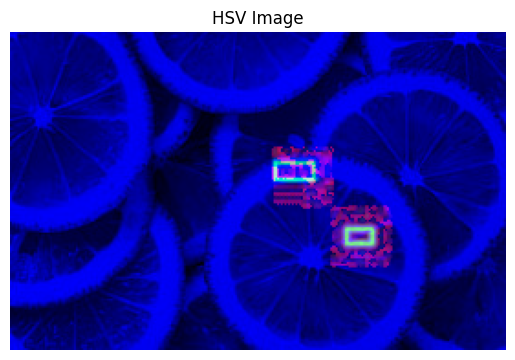

In [46]:
hsv_img = cv2.cvtColor(input_img, cv2.COLOR_BGR2HSV)
display(hsv_img,'HSV Image')

`Creating a mask`

In [15]:
lower_limit = np.array([0,0,200])
upper_limit = np.array([180,200,255])

The upper and lower limits for masking in HSV color space depend on the color you want to filter. These limits define a range of colors in the HSV color space. Any color that falls within this range will be included in the mask.

Here's a general guideline for choosing these limits:

Hue (H): This represents the color type. It ranges from 0 to 180 in OpenCV. For example, red hues are around 0 or 180, green hues are around 60, and blue hues are around 120.

Saturation (S): This represents the vibrancy of the color. It ranges from 0 (gray) to 255 (vibrant).

Value (V): This represents the brightness of the color. It ranges from 0 (black) to 255 (bright).

So, if you want to create a mask for a specific color, you would set the lower_limit and upper_limit to include a range of hues around that color's hue, and a range of saturations and values that include the shades of the color you're interested in.

For example, if you want to filter red colors, you might use:

This will include hues from 0 to 10 (red hues), saturations from 100 to 255 (moderately vibrant to vibrant), and values from 100 to 255 (moderately bright to bright).

Note that choosing these limits can be somewhat trial and error, and may depend on the specific images you're working with. You might need to adjust these limits and experiment to get the results you want.

In [78]:
masked_img = cv2.inRange(hsv_img, lower_limit, upper_limit)

(<Axes: title={'center': 'Masked Image'}>, None)

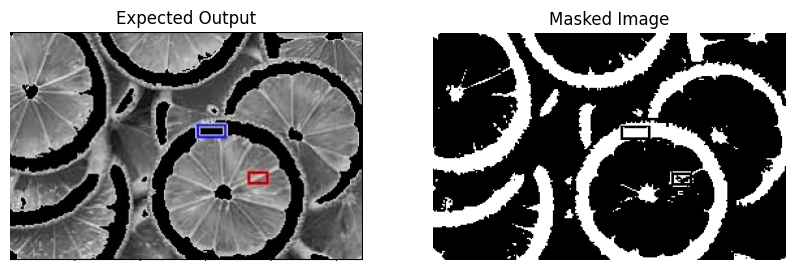

In [80]:
plt.figure(figsize=(10,5))

plt.subplot(121), display(output_img,'Expected Output')
plt.subplot(122), display(masked_img,'Masked Image')

`Inverting the masked image`

In [85]:
inverted_img = cv2.bitwise_not(masked_img)

(<Axes: title={'center': 'Inverted Image'}>, None)

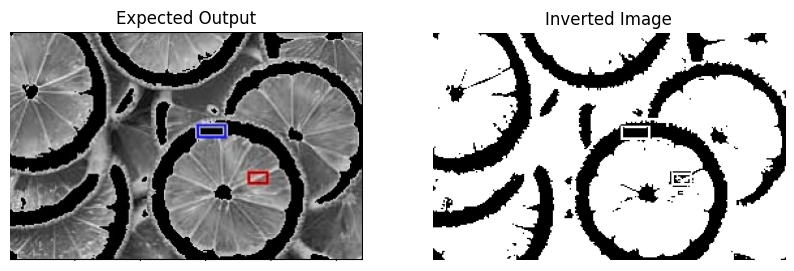

In [87]:
plt.figure(figsize=(10,5))

plt.subplot(121), display(output_img,'Expected Output')
plt.subplot(122), display(inverted_img,'Inverted Image')

In [88]:
inverse_mask = 255 - masked_img
final_image = cv2.bitwise_and(input_img, input_img, mask=inverse_mask) # The cv2.bitwise_and() function takes two images and a mask, and performs a bitwise AND operation on the two images, but only in areas where the mask is white.

(<Axes: title={'center': 'Final Image'}>, None)

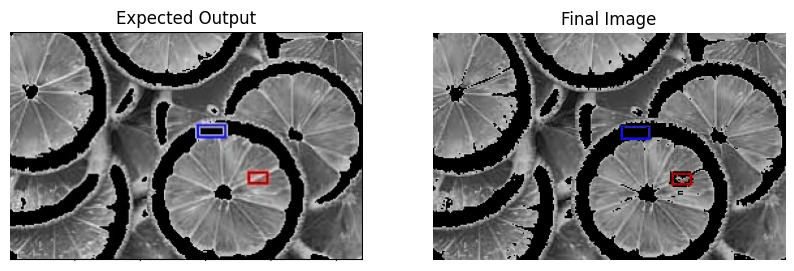

In [89]:
plt.figure(figsize=(10,5))

plt.subplot(121), display(output_img,'Expected Output')
plt.subplot(122), display(final_image,'Final Image')

#### Question 2 :

Generate masks for the given input image

(661, 734, 3)


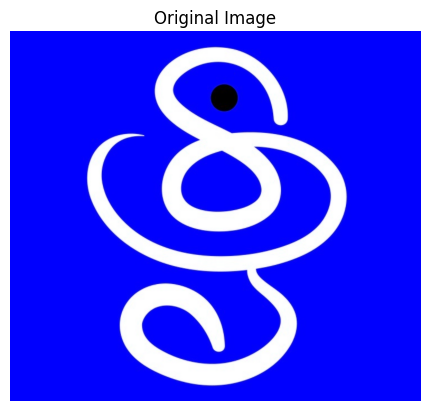

In [5]:
img = cv2.imread('Images/Tamil.jpg')
print(img.shape)
display(img,'Original Image')

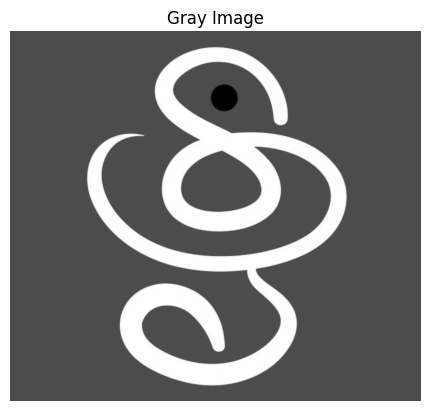

In [21]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
display(gray,'Gray Image')

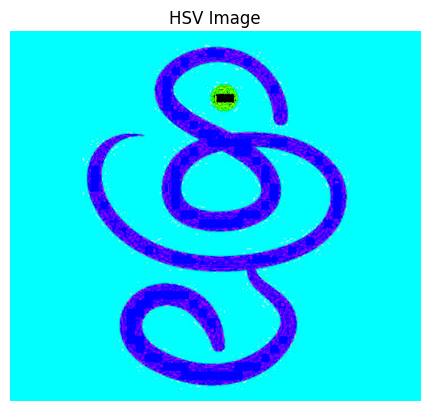

In [17]:
hsv_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
display(hsv_img,'HSV Image')

`Method 1`

In [18]:
lower_limit = np.array([0,0,200])
upper_limit = np.array([180,200,255])

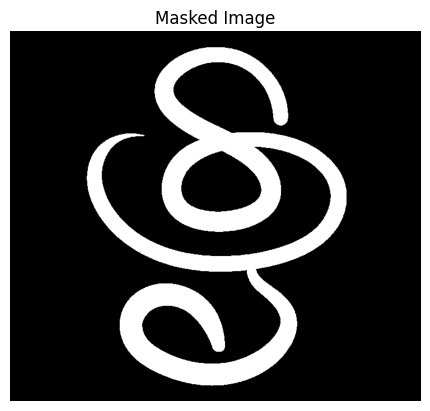

In [19]:
masked_img = cv2.inRange(hsv_img, lower_limit, upper_limit)
display(masked_img,'Masked Image')

`Method 2`

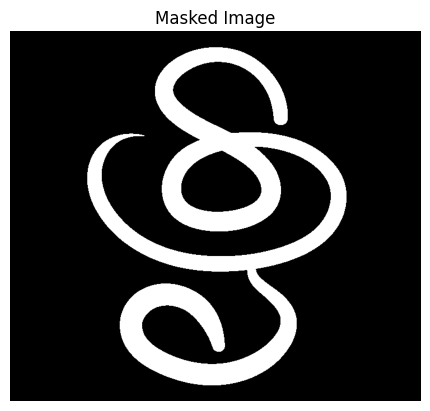

In [22]:
_, threshold = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
display(threshold,'Masked Image')